<a href="https://www.kaggle.com/code/subhajeetdas/amazon-stock-price-prediction?scriptVersionId=126315555" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1>Amazon Stock Price Detection</h1>

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import datetime
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/amazon-stock-price-all-time/Amazon.csv


# Loading Data

In [2]:
df = pd.read_csv("/kaggle/input/amazon-stock-price-all-time/Amazon.csv")

In [3]:
viz = df.copy()

In [4]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
5,1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800
6,1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200
7,1997-05-27,1.510417,1.645833,1.458333,1.583333,1.583333,8697600
8,1997-05-28,1.625000,1.635417,1.531250,1.531250,1.531250,4574400
9,1997-05-29,1.541667,1.541667,1.479167,1.505208,1.505208,3472800


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.shape

(6155, 7)

<AxesSubplot:ylabel='Density'>

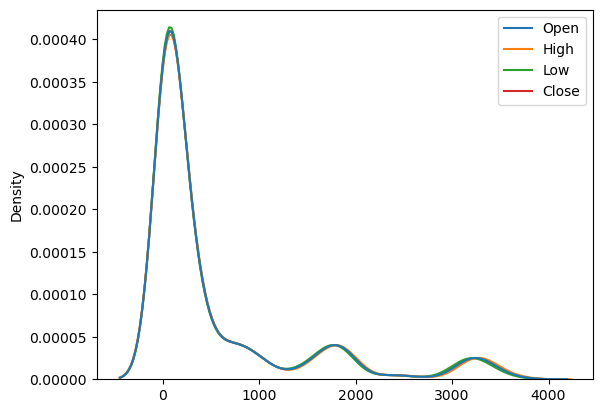

In [7]:
sns.kdeplot(data = df[['Open', 'High', 'Low', 'Close']])

<AxesSubplot:xlabel='Open', ylabel='Density'>

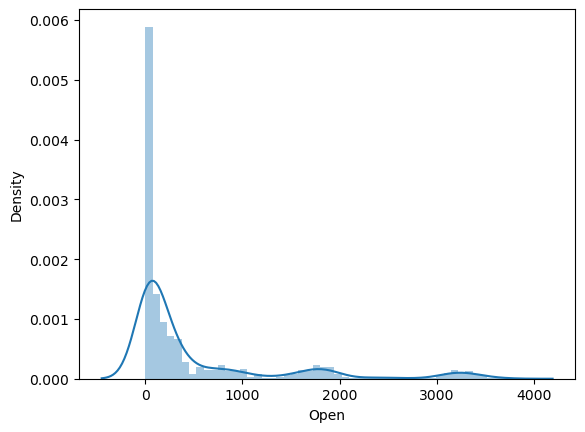

In [8]:
sns.distplot(df.Open)

<AxesSubplot:xlabel='High', ylabel='Density'>

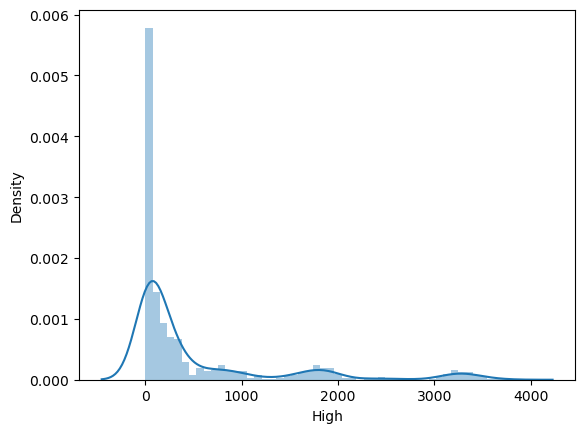

In [9]:
sns.distplot(df.High)

<AxesSubplot:xlabel='Close', ylabel='Density'>

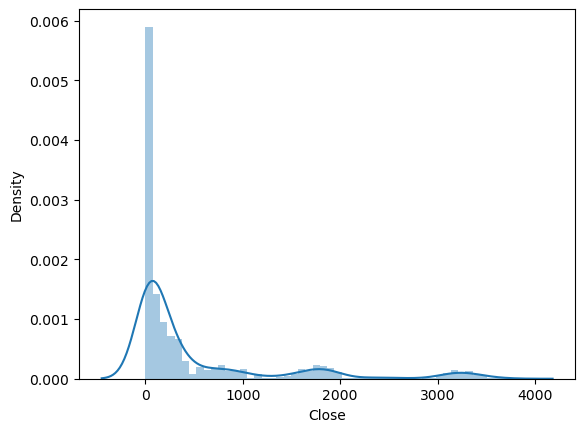

In [10]:
sns.distplot(df.Close)

<AxesSubplot:xlabel='Volume', ylabel='Density'>

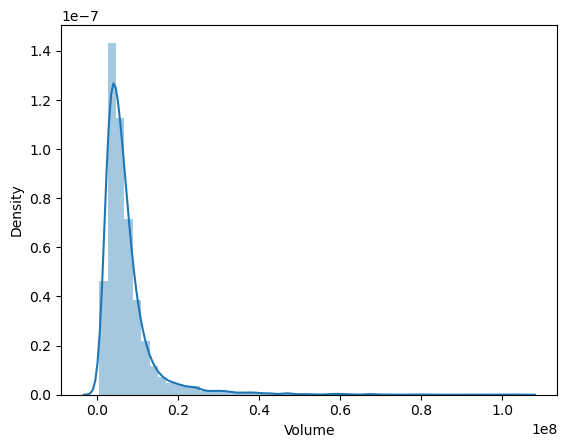

In [11]:
sns.distplot(df.Volume)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6155 non-null   object 
 1   Open       6155 non-null   float64
 2   High       6155 non-null   float64
 3   Low        6155 non-null   float64
 4   Close      6155 non-null   float64
 5   Adj Close  6155 non-null   float64
 6   Volume     6155 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 336.7+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,6155.0,5.205563e+02,8.571617e+02,1.406250,3.875000e+01,9.267000e+01,5.289500e+02,3.744000e+03
High,6155.0,5.262161e+02,8.658210e+02,1.447917,3.951500e+01,9.419000e+01,5.353050e+02,3.773080e+03
Low,6155.0,5.142773e+02,8.472709e+02,1.312500,3.810500e+01,9.075000e+01,5.219500e+02,3.696790e+03
Close,6155.0,5.204298e+02,8.566685e+02,1.395833,3.882125e+01,9.264000e+01,5.294500e+02,3.731410e+03
Adj Close,6155.0,5.204298e+02,8.566685e+02,1.395833,3.882125e+01,9.264000e+01,5.294500e+02,3.731410e+03
Volume,6155.0,7.329010e+06,7.149521e+06,487200.000000,3.579350e+06,5.470000e+06,8.294950e+06,1.043292e+08


# Train & Test Splitting the Data

In [14]:
train, test = train_test_split(df, test_size = 0.2)

In [15]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
4206,2014-02-03,358.980011,360.850006,340.100006,346.149994,346.149994,10280800
4700,2016-01-20,564.359985,578.450012,547.179993,571.770020,571.770020,7966400
2814,2008-07-23,67.459999,72.070000,67.459999,70.540001,70.540001,17916200
5885,2020-10-02,3153.629883,3195.800049,3123.000000,3125.000000,3125.000000,5613100
3718,2012-02-23,179.639999,180.750000,176.960007,178.889999,178.889999,5153800
3579,2011-08-04,206.729996,208.000000,201.449997,201.479996,201.479996,6579500
469,1999-03-26,70.000000,73.875000,68.687500,69.531250,69.531250,24922000
4300,2014-06-18,328.000000,335.750000,325.000000,334.380005,334.380005,6401500
5330,2018-07-20,1825.010010,1834.839966,1810.060059,1813.699951,1813.699951,3884400
3707,2012-02-07,182.649994,184.940002,182.059998,184.190002,184.190002,5103900


In [16]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
175,1998-01-26,4.979167,4.989583,4.739583,4.812500,4.812500,4712400
2625,2007-10-22,89.250000,91.690002,89.019997,91.290001,91.290001,9868400
2059,2005-07-22,37.889999,38.230000,37.240002,37.950001,37.950001,5871100
3893,2012-11-02,234.009995,237.399994,232.110001,232.419998,232.419998,3374700
231,1998-04-16,8.010417,8.276042,7.765625,8.208333,8.208333,16244400
1563,2003-08-04,39.700001,40.290001,38.950001,39.650002,39.650002,7054400
2837,2008-08-25,84.629997,84.639999,82.449997,82.849998,82.849998,4356400
5216,2018-02-06,1361.459961,1443.989990,1351.790039,1442.839966,1442.839966,11066800
5373,2018-09-20,1938.579956,1955.000000,1932.250000,1944.300049,1944.300049,3154900
3060,2009-07-15,83.000000,84.639999,82.779999,84.550003,84.550003,6339000


In [17]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [18]:
y_train = train['Close'].values
y_test = test['Close'].values

# Linear Regression 

In [19]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(x_test)

# Visualizing the Data

In [21]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [22]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-17,NaN
1997-05-18,NaN
1997-05-19,1.708333
...,...
2021-10-23,NaN
2021-10-24,NaN
2021-10-25,3320.370117


In [23]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

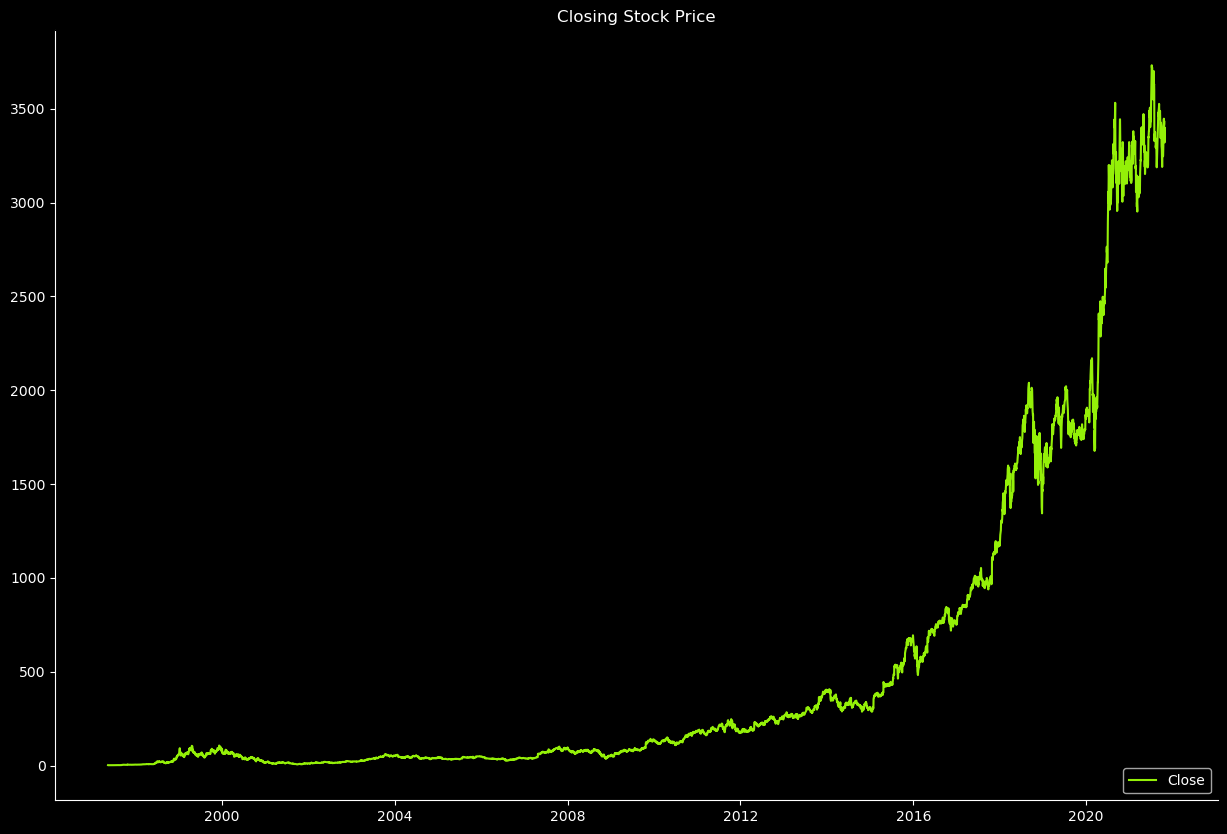

In [24]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

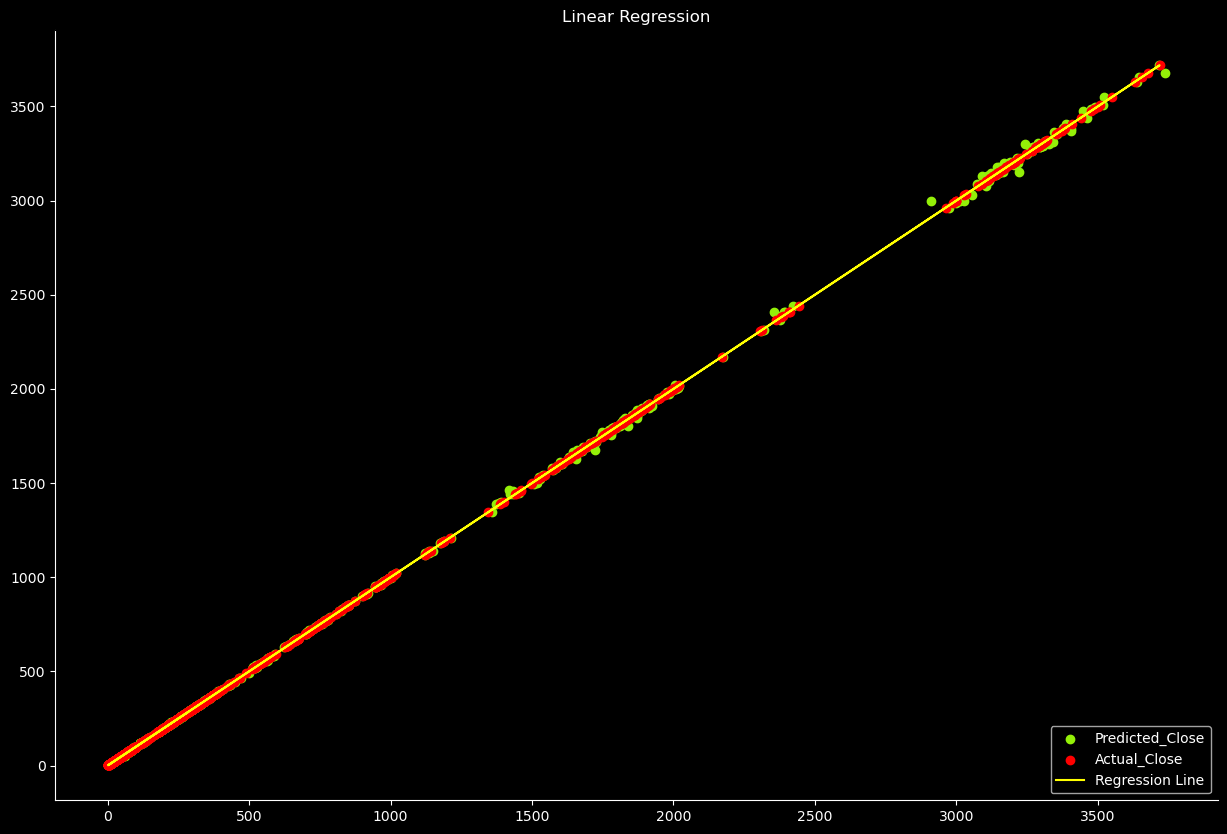

In [25]:
style()

plt.title('Linear Regression', color="white")
plt.scatter(y_pred, y_test, color="#94F008")
plt.scatter(y_test, y_test, color="red")
plt.plot(y_test, y_test, color="yellow")
plt.legend(["Predicted_Close", "Actual_Close", "Regression Line"], loc ="lower right", facecolor='black', labelcolor='white')

**Actual Close Price vs. Predicted Close Price**

<div class="flourish-embed flourish-chart" data-src="visualisation/13460688"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

# Model Evaluation

In [26]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 50.427
RMSE 7.101
MAE 2.667
MAPE 0.01
R2 Score :  1.0


In [27]:
pred_df = test.copy()
pred_df

,Date,Open,High,Low,Close,Adj Close,Volume
175,1998-01-26,4.979167,4.989583,4.739583,4.812500,4.812500,4712400
2625,2007-10-22,89.250000,91.690002,89.019997,91.290001,91.290001,9868400
2059,2005-07-22,37.889999,38.230000,37.240002,37.950001,37.950001,5871100
3893,2012-11-02,234.009995,237.399994,232.110001,232.419998,232.419998,3374700
231,1998-04-16,8.010417,8.276042,7.765625,8.208333,8.208333,16244400
...,...,...,...,...,...,...,...
3982,2013-03-14,269.670013,270.000000,263.529999,265.739990,265.739990,5226700
1582,2003-08-29,45.820000,46.439999,45.720001,46.320000,46.320000,6158400
4478,2015-03-04,385.709991,387.899994,382.190002,382.720001,382.720001,2259100
5421,2018-11-28,1613.920044,1681.449951,1601.219971,1677.750000,1677.750000,8458700


In [28]:
result = model.predict([[2.437500, 2.500000, 1.927083, 72156000]])
print(result)

[1.59807932]


In [29]:
pred_df['Close_Prediction'] = y_pred
pred_df

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
175,1998-01-26,4.979167,4.989583,4.739583,4.812500,4.812500,4712400,4.907659
2625,2007-10-22,89.250000,91.690002,89.019997,91.290001,91.290001,9868400,91.163075
2059,2005-07-22,37.889999,38.230000,37.240002,37.950001,37.950001,5871100,37.759183
3893,2012-11-02,234.009995,237.399994,232.110001,232.419998,232.419998,3374700,235.448413
231,1998-04-16,8.010417,8.276042,7.765625,8.208333,8.208333,16244400,8.046073
...,...,...,...,...,...,...,...,...
3982,2013-03-14,269.670013,270.000000,263.529999,265.739990,265.739990,5226700,265.228476
1582,2003-08-29,45.820000,46.439999,45.720001,46.320000,46.320000,6158400,46.344364
4478,2015-03-04,385.709991,387.899994,382.190002,382.720001,382.720001,2259100,384.846937
5421,2018-11-28,1613.920044,1681.449951,1601.219971,1677.750000,1677.750000,8458700,1660.679689


In [30]:
pred_df[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1231.0,512.760352,871.883847,1.427083,38.394998,85.589996,432.305007,3718.550049
Close_Prediction,1231.0,512.640626,871.575872,1.422318,38.613246,84.765505,433.048543,3737.192447


# Saving the Prediction Data as CSV

In [31]:
pred_df['Date'] = pd.to_datetime(pred_df['Date'],format='%Y-%m-%d')

In [32]:
output = pd.DataFrame(pred_df[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
1997-05-20,1.635417,1.773179
1997-05-21,1.427083,1.422318
1997-05-22,NaN,NaN
1997-05-23,NaN,NaN
1997-05-24,NaN,NaN
...,...,...
2021-10-11,NaN,NaN
2021-10-12,3247.330078,3248.982233
2021-10-13,NaN,NaN


In [33]:
output.to_csv('Close_Prediction.csv', index=True)
print("CSV successfully saved!")

CSV successfully saved!


<br>
<p style="text-align:center; font-weight:800; font-size:18px"><em>Thank you! For viewing this Notebook, do upvote if you like it and please feel free to provide feedback.</em>
<p style="text-align:center"><img src="https://cdn.pixabay.com/animation/2023/03/21/22/04/22-04-05-16_512.gif" width="480" height="200"></p>